<a href="https://colab.research.google.com/github/Azyur-i/CSS145-Act1.3/blob/main/SummativeAssessment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
name = "Fernando, Heughric"
studNum = "2023101660"
print(f"Name: {name}\nStudent Number: {studNum}")

Name: Fernando, Heughric
Student Number: 2023101660


**Work with bank_marketing_training dataset.**

In [172]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [173]:
# Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset here
bank_data = pd.read_csv('bank.csv')

**1. Derive an index field and add it to the data set.**

In [174]:
bank_data['index'] = pd.Series(range(0, 41188))
bank_data['index'] = pd.Series(range(0,len(bank_data)))

**2. For the *pdays* field, change the field value 999 to the appropriate code for missing values.**

In [175]:
bank_data['pdays'] = bank_data['pdays'].replace({999: np.NaN})

**3. For the variable *month*, change the field values to 1–12, but keep the variable as categorical.**

In [176]:
bank_data['month_valCategorical'] = bank_data['month']
month_dict = {"month_valCategorical": {"jan": "1", "feb": "2", "mar": "3", "apr": "4", "may": "5", "jun": "6", "jul": "7", "aug": "8", "sep": "9", "oct": "10", "nov": "11", "dec": "12", "unknown": "NaN"}}
bank_data.replace(month_dict, inplace = True)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,month_valCategorical
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2,5
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3,5
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,41183,11
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,41184,11
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,41185,11
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,41186,11


**4. Standardize the age field. Print out a list of the first 10 records, including the columns *job*, *age*, and the standardized age field.**

In [177]:
bank_data['sdz_age'] = stats.zscore(bank_data['age'])
bank_data[['job', 'age', 'sdz_age']].head(10)

,job,age,sdz_age
0,housemaid,56,1.533034
1,services,57,1.628993
2,services,37,-0.290186
3,admin.,40,-0.002309
4,services,56,1.533034
5,services,45,0.477486
6,admin.,59,1.820911
7,blue-collar,41,0.093650
8,technician,24,-1.537652
9,services,25,-1.441693


**5. Obtain a list of all records that are outliers based on the standardized age field. Print out a list of the 10 largest standardized age field values. (Outliers: Greater than 2.5 or less than -2.5)**

In [178]:
bank_data_outlier = bank_data.query('sdz_age > 2.5 or sdz_age < -2.5')
bank_data_outlier[['sdz_age']]

,sdz_age
27713,2.876459
27757,3.452213
27774,2.588583
27780,3.164336
27800,4.603720
...,...
40996,3.932008
41004,3.836049
41153,2.588583
41183,3.164336


In [179]:
bank_data_top = bank_data.sort_values(['sdz_age'], ascending = False)
bank_data_top[['sdz_age']].head(10)

,sdz_age
38452,5.563310
38455,5.563310
27826,5.275433
38921,5.179474
39655,4.987556
40450,4.987556
39734,4.987556
40469,4.987556
38032,4.891597
38022,4.891597


**6. Create a contingency table of *job* with *response*, with counts and column percentages**

In [180]:
bank_countTable = pd.crosstab(bank_data['job'], bank_data['response'], margins = True, margins_name = 'Count')
print("Count Contingency Table (Job and Response): \n", bank_countTable)
print("\n")
bank_percentTable = bank_countTable.div(bank_countTable['Count'], axis = 0)*100
print("Column Percentage Contingency Table (Job and Response): \n", bank_percentTable)

Count Contingency Table (Job and Response): 
 response          no   yes  Count
job                              
admin.          9070  1352  10422
blue-collar     8616   638   9254
entrepreneur    1332   124   1456
housemaid        954   106   1060
management      2596   328   2924
retired         1286   434   1720
self-employed   1272   149   1421
services        3646   323   3969
student          600   275    875
technician      6013   730   6743
unemployed       870   144   1014
unknown          293    37    330
Count          36548  4640  41188


Column Percentage Contingency Table (Job and Response): 
 response              no        yes  Count
job                                       
admin.         87.027442  12.972558  100.0
blue-collar    93.105684   6.894316  100.0
entrepreneur   91.483516   8.516484  100.0
housemaid      90.000000  10.000000  100.0
management     88.782490  11.217510  100.0
retired        74.767442  25.232558  100.0
self-employed  89.514426  10.485574  100

**7. Combine the *job* categories according to the following "yes" *response* percentages: 0 < 10, 10 < 25, 25 < 33. Name the new variable job2**

In [215]:
bank_percentTable_010 = bank_percentTable.query('yes >= 0 and yes < 10').copy()
bank_percentTable_010['job2'] = '0 < 12'
print(bank_percentTable_010[['yes', 'job2']])
print("\n")
bank_percentTable_1025 = bank_percentTable.query('yes >= 10 and yes < 25').copy()
bank_percentTable_1025['job2'] = '10 < 25'
print(bank_percentTable_1025[['yes', 'job2']])
print("\n")
bank_percentTable_2533 = bank_percentTable.query('yes >= 25 and yes < 33').copy()
bank_percentTable_2533['job2'] = '25 < 33'
print(bank_percentTable_2533[['yes', 'job2']])
print("\n")

response           yes    job2
job                           
blue-collar   6.894316  0 < 12
entrepreneur  8.516484  0 < 12
services      8.138070  0 < 12


response             yes     job2
job                              
admin.         12.972558  10 < 25
housemaid      10.000000  10 < 25
management     11.217510  10 < 25
self-employed  10.485574  10 < 25
technician     10.826042  10 < 25
unemployed     14.201183  10 < 25
unknown        11.212121  10 < 25
Count          11.265417  10 < 25


response        yes     job2
job                         
retired   25.232558  25 < 33
student   31.428571  25 < 33




**8. Bin the *age* variable using the bins specified below and create a normalized bar chart of the binned age variable with response overlay.**

Bins:

*   Under 30
*   30 to 65
*   Over 65

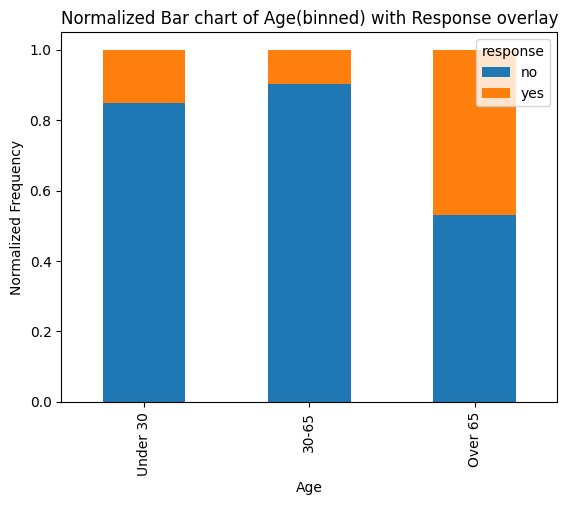

In [182]:
bank_data['age_binned'] = pd.cut(x = bank_data['age'], bins = [0, 30, 65.01, np.inf], labels=["Under 30", "30-65", "Over 65"])

bank_calTable = pd.crosstab(bank_data['age_binned'], bank_data['response'], normalize = 'index')
bank_calTable.plot(kind = 'bar', stacked = True)
plt.title('Normalized Bar chart of Age(binned) with Response overlay')
plt.xlabel('Age')
plt.ylabel('Normalized Frequency')
plt.show()

### END ###

In [183]:
# Using datetime
from datetime import datetime
import pytz
tz = pytz.timezone('Asia/Manila')
manila_now = datetime.now(tz)
# Print timestamp
print("Timestamp:", manila_now)

Timestamp: 2024-09-14 23:38:46.251263+08:00
